In [43]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from functools import partial
from mpl_toolkits import mplot3d
from scipy.stats import norm
from numpy import ma
from matplotlib import ticker, cm

# **Part A:**

Maximum Likelihood Estimator for Parameter Estimation

In [44]:
data_0 = np.array([
    [24.97467969839018, 14.504545498621724],
    [27.090094575573442, 12.30597776569358],
    [19.153229570537036, 1.1224428018325945],
    [32.980912742625264, 28.787312352356068],
    [31.816648495376327, 18.80472071109226],
    [38.16481456323595, 13.3152538073791],
    [39.16350360498408, 18.32761254728531],
    [31.33807364278855, 15.250304424591867],
    [39.25679746753066, 38.179988690236726],
    [25.59541128586236, 17.066636312522682],
    [38.58734644465331, 13.564496680602005],
    [31.526307256338228, 11.255274327209692],
    [21.64213696740311, 16.229022075508126],
    [24.230483518400128, 12.263772942140733],
    [29.265584223855853, 16.925395788699138],
    [28.252292511785612, 20.334244991609307],
    [27.12297858277194, 14.338873886920101],
    [30.285511383959097, 24.171349190094425],
    [31.005977614466396, 23.762995469525492],
    [25.542543700304883, 5.91802125245739],
    [26.47348640364448, 19.638455353357298],
    [40.18940281207708, 18.668778140584514],
    [33.037669482569044, 15.15570097243874],
    [35.64867502721652, 23.369787466839227],
    [33.394130204970146, 25.268421146848222],
    [24.182524821280143, 16.36309843064755],
    [24.076464557153482, 15.314950036427277],
    [33.087808854171776, 22.46070117802791],
    [18.339232140010182, 6.4201110075923395],
    [17.030339132501254, 2.8012977137840878],
    [19.16367551614868, 17.768202278714337],
    [30.399834767507414, 25.82402007292977],
    [13.149766949310695, 7.122818872315756],
    [46.97246650739394, 24.577642421748948],
    [28.807005536350538, 5.671512591627327],
    [19.86166087178237, 22.016537360768496],
    [33.68111752798275, 15.707926477328854],
    [20.36762113637726, 8.03480681093552],
    [25.220988271404728, 20.783718533159757],
    [34.33944504897553, 7.034648673753116],
    [36.46932060220665, 19.490815627790962],
    [19.103398936294397, 14.528544743090194],
    [37.07834128848617, 9.861678090022558],
    [18.127452153677275, 16.423119109710647],
    [31.428853589559587, 7.868613516331019],
    [27.905341092490623, 14.811020759039923],
    [30.57208627848106, 16.47851657080185],
    [28.150143537431568, 10.103067430983062],
    [24.8718878220957, 25.200702803981464],
    [28.332768061917648, 10.40332737218593],
    [34.79105563145385, 25.851031514753203],
    [25.773964051783633, 15.994138686287268],
    [17.850209616305342, 12.225538730432731],
    [23.579708925939595, 16.52717221207142],
    [39.67835728910902, 21.95200378288049],
    [20.685657941316286, 13.543158446921126],
    [25.982321923611533, 13.34788674306283],
    [33.074224184070935, 21.105728582216855],
    [41.01954983229733, 27.480464558655118],
    [45.1672627267445, 26.70473965037681],
    [37.79788546372592, 17.67738408015966],
    [27.27503850636979, 12.505828149801104],
    [42.27695106723079, 24.688364330607655],
    [29.858302722587403, 22.50839515843808],
    [29.01449729155842, 14.569375086622134],
    [39.118376298028494, 26.812498618194542],
    [26.772225673348355, 16.534264495642486],
    [31.230651200983047, 14.982395564357496],
    [30.981830732453325, 24.2959824230451],
    [28.03812959884472, 7.161144455036007],
    [32.27411850598569, 2.7366327301359874],
    [27.107044532034994, 8.656122084563044],
    [23.589463613172803, 15.237271479876568],
    [20.111468802868465, 5.825271535991957],
    [35.06056028505704, 10.995705258940143],
    [30.631204430741064, 17.893731839911286],
    [27.131965003077084, 10.0915509408347],
    [25.39877098901797, 18.09918318478722],
    [23.62204359917191, 15.137924069125997],
    [35.95736680287625, 20.865093534740456],
    [19.25339300067111, 10.42509394918272],
    [35.41081507834921, 34.654146201986585],
    [26.92147343880633, 18.646391234497198],
    [28.186788078836543, 18.703621351025223],
    [34.47655645449341, 21.367794680759722],
    [24.94942860668023, 20.01099766854866],
    [20.619589431411057, 19.85744626456458],
    [33.44425708920528, 17.426920763800318],
    [22.065739513586603, 12.198172788136922],
    [26.870704294735837, 9.949383283089391],
    [41.45771640922904, 18.1964602237986],
    [33.25489239603091, 19.16207176556233],
    [32.693637981717615, 21.0423014040025],
    [27.354283080087523, 14.271375447720086],
    [24.762754572488454, 6.182155562616208],
    [20.25463532888877, 12.820729887689836],
    [27.86063344341371, 21.63107230913077],
    [41.48322608005099, 25.51129738260698],
    [22.118569850436504, 26.968621655860453],
    [30.156263898374853, 32.35603665507355]
    ])

data_1 = np.array([
    [43.938911315907625, 36.87146728611616],
    [43.98164010973954, 38.59948179963487],
    [38.3642097224507, 32.74945443265497],
    [40.06174541898381, 36.564944916573516],
    [38.211428151980904, 31.71464769416076],
    [41.18796751419362, 39.17608260331072],
    [40.32956978516903, 32.12132608437938],
    [38.74219104712392, 34.60213315459584],
    [37.72210494625572, 30.616041110504007],
    [36.33622356097608, 29.9762748547628],
    [45.24942796996638, 38.143886379640016],
    [43.69029811861015, 40.954644167280954],
    [39.18300072915758, 32.59312293613843],
    [42.8882056607554, 38.96134862455709],
    [41.8874277267945, 38.24951566248669],
    [41.7970394210136, 38.44382313299293],
    [45.29560769784872, 37.69351493189242],
    [38.948851207318945, 35.21808257267893],
    [43.109204390305955, 38.506524301031305],
    [41.81384930570261, 34.384294111304285],
    [39.49498307925154, 34.70969754258862],
    [38.843253001848026, 27.944245026333164],
    [36.17788399823665, 33.96297344080785],
    [37.38759245589562, 28.20016061735646],
    [41.34889181755119, 32.327587111792774],
    [47.56975940487664, 44.650600643622425],
    [39.39280237825057, 34.923309457471376],
    [40.665904607452696, 36.72923616356956],
    [42.2965051755828, 38.971623707650345],
    [35.45684398004309, 28.99070062255243],
    [40.2080355526233, 28.815102219902336],
    [37.17141126074457, 28.851873721556117],
    [40.45122310214349, 34.50461922413571],
    [38.03336925394242, 30.654388674877765],
    [42.485283452215896, 41.787148066868966],
    [41.05566729774741, 33.22731881178824],
    [41.87508716281467, 41.092900950729074],
    [35.90304603170612, 28.95153356168646],
    [43.56743511016792, 34.9873669314657],
    [41.41261208405239, 37.24725804517698],
    [36.99157129412091, 30.98226840941961],
    [38.42551317235955, 32.145574263089536],
    [39.30338217466628, 30.20583555034952],
    [37.50111589643913, 29.5636132420259],
    [43.6739092799813, 34.82489150603591],
    [37.942121816764505, 29.101853047029003],
    [42.61452636415815, 34.14269079004941],
    [47.444200300915895, 39.53989852862226],
    [43.19722096614947, 37.934454619057696],
    [41.98808347839853, 39.13003547056611],
    [44.249330804803165, 35.535744516551816],
    [38.56586869441201, 32.75539709202968],
    [43.46871662610693, 38.13976912028241],
    [33.92914495601694, 32.31742577768868],
    [44.228183467954665, 38.301268268490716],
    [37.43529766805671, 31.510135784769723],
    [38.13349615272657, 33.895461490694956],
    [41.62424291897898, 37.34779117424227],
    [35.76878884895523, 29.168122116538292],
    [43.07737301365197, 37.0338614474408],
    [42.9069464656236, 38.59584620980404],
    [42.586980689890154, 35.525423072539176],
    [39.02682997132764, 31.457595613689392],
    [37.25348279301722, 34.84462740058045],
    [39.07582905771642, 35.19686426168397],
    [41.09685185187746, 35.67356007698102],
    [36.62700959140655, 26.820720834644867],
    [45.264249633904704, 41.655224227471386],
    [38.82059010749962, 30.384999024889282],
    [39.18777491622001, 30.18056776272377],
    [36.673073477435956, 32.1916059144522],
    [42.323988522572186, 38.03154067804528],
    [42.57802314481109, 40.248715356441394],
    [38.694266783972154, 31.60709389171209],
    [39.720357054216585, 31.508103832630738],
    [39.79553912772707, 33.938020627418524],
    [39.014699167816985, 36.63670065689946],
    [42.198589335802666, 34.03434490037531],
    [37.80893745285458, 27.839004075789155],
    [38.255464230788945, 31.440912831309063],
    [39.81702308015201, 34.51783827049311],
    [39.75354689381546, 35.86267251265675],
    [39.83112697425367, 32.06459203998274],
    [37.87783992466487, 32.08166073161177],
    [35.85529149476697, 25.139892466967556],
    [38.92126209953337, 34.14901944732243],
    [33.114082903576985, 27.061174809876867],
    [41.38113629179428, 38.263398628678026],
    [38.31687020943566, 31.456863749150855],
    [41.760220707423805, 36.27628659112911],
    [31.79385757783205, 20.842340539935208],
    [42.97774908759978, 41.60311507665078],
    [41.326139646287174, 34.34639303286358],
    [39.84463097704167, 32.46025246240992],
    [44.458824480470355, 42.66180638553922],
    [39.96874427122386, 36.28198175032862],
    [34.29741701352914, 20.443261063797017],
    [36.614827546376404, 33.88049036892335],
    [42.51644572248322, 35.97583836070076],
    [47.33181426026008, 43.68240150675391]
    ])

data_2 = np.array([
    [26.118558392760157, 36.98554399878432],
    [28.656552707957296, 38.182605427286646],
    [31.607416672474812, 38.165430743949905],
    [27.139287564629807, 34.243964514799636],
    [27.70407631469015, 36.44495682297099],
    [25.47380189078156, 29.88047184222296],
    [25.646086182979026, 30.463882697085808],
    [27.18310372746103, 31.268012851248805],
    [38.58484612987645, 45.2809352128634],
    [24.905121211373455, 32.33664627197827],
    [25.270745011397693, 32.619470736667495],
    [31.574218719104692, 41.11957578453198],
    [24.888378226350962, 27.20125925561441],
    [33.47088663340133, 42.98269547582912],
    [21.998350581760455, 26.790731223991006],
    [19.658655383896416, 26.1240249514721],
    [24.855783443092147, 37.29907449545912],
    [27.747306284136023, 31.596820658905408],
    [25.848560485966363, 30.385559864748785],
    [29.413032879384645, 33.40167165909398],
    [25.092724456881594, 25.611155328691588],
    [30.401081419613305, 44.126271170329716],
    [30.985463265384368, 35.39274616887036],
    [29.32820759028531, 32.57528753666598],
    [29.448777932195036, 35.09234759508228],
    [26.807762997189478, 33.69472751099397],
    [27.940259639597627, 28.122913687033332],
    [26.80559429955721, 33.10367151564501],
    [30.100980365760513, 38.73113977205426],
    [29.166855491224027, 33.45756533292005],
    [29.63440549122643, 36.08650566750187],
    [20.18074577122451, 30.26418855446613],
    [25.249211019156245, 27.41651882667285],
    [22.662973156118795, 35.36592638944971],
    [27.767886735119184, 30.568961102043133],
    [24.941238457626028, 40.802032844206934],
    [27.558347367808977, 39.737180563603935],
    [25.69772474526501, 37.36797598050147],
    [24.090099793756046, 37.147577158523504],
    [21.72548608477651, 27.81988973352093],
    [20.01906178043488, 31.852204367513252],
    [26.97475322022816, 33.40461408502355],
    [33.02474637336182, 35.98967149081336],
    [26.119800475748647, 37.78289600546074],
    [24.301917252138683, 42.62043741118756],
    [25.383219880345973, 38.80316007875246],
    [27.62249549894068, 41.65355546864391],
    [30.49248411423475, 37.950489881728515],
    [27.582220387152844, 35.89317328452276],
    [24.136313572884514, 31.8004257398429],
    [24.19386591754126, 37.28569044358602],
    [23.205137086498254, 22.770801042055837],
    [26.72442304834887, 31.113610733898497],
    [26.887898142913492, 31.270492769661644],
    [34.9774054793011, 37.93808623490448],
    [30.954181527374466, 37.56671314854478],
    [29.24549588848712, 34.71883883682324],
    [21.88712533695842, 30.160243107292985],
    [30.141289376124085, 35.577373967512656],
    [32.770765322247904, 37.74146255933535],
    [26.6244041460391, 38.49036688687653],
    [24.888382160176636, 25.19004661768992],
    [35.63305566668339, 45.16195489007926],
    [28.505961553156162, 41.036928169151096],
    [28.64041294381908, 35.82237562634678],
    [27.741247519836115, 36.065474230525325],
    [25.569314393055397, 33.413507025031144],
    [17.66660074386368, 28.228061582432417],
    [23.316511548353866, 36.475986749959354],
    [34.30901172406985, 38.18578592151953],
    [20.963119652369976, 31.17673156133823],
    [25.010399420548517, 35.08692236181734],
    [29.17998619838086, 37.946245134705904],
    [33.923233067628004, 46.062217016922155],
    [31.51784268309958, 39.31181728528641],
    [28.892159376913362, 31.779865868947994],
    [27.43812268680146, 39.883413327756415],
    [28.194615431964202, 36.1403774213305],
    [31.843125495684333, 35.58329710013349],
    [30.469105880205213, 37.981316488119425],
    [27.01960370551909, 39.44588785035491],
    [27.64225353606146, 29.23796270650378],
    [28.65746138462449, 39.826173810969614],
    [26.643689070861065, 31.013722612392414],
    [31.32278174859892, 39.221102916933795],
    [28.68167604045206, 31.962844597428607],
    [26.31395481579364, 31.135686435737213],
    [31.882782676063314, 40.295363556429244],
    [37.13870462120642, 41.31160681549878],
    [22.681954309005807, 27.950772833843857],
    [27.960767073613454, 35.295891579965286],
    [27.96825457781948, 30.68953264555008],
    [26.099130697309086, 28.262183204285634],
    [23.77638094048231, 32.01156280130771],
    [24.62056638277588, 22.42544711044635],
    [30.671307017386482, 38.605381275055734],
    [31.355304433228575, 34.27459396903779],
    [30.45873051781789, 42.07716284811732],
    [26.73018411974695, 27.980131766953477],
    [27.305209228319153, 38.12047635780232]
    ])

In [45]:
#Defines the formula for 2-dimensional Gaussian distribution
def Gauss_distr(x_mean, x_cov, x):
  x = x.reshape((2, 1))
  x_mean = x_mean.reshape((2, 1))
  return (2 * np.pi) ** (-1) * (np.linalg.det(x_cov)) ** (-1 / 2) * np.exp((-1 / 2) * (x - x_mean).T @ np.linalg.inv(x_cov) @ (x - x_mean))

***1.***

In [46]:
def mean_func(x_array):
  x_mean = np.zeros(2)
  x_norm = len(x_array)
  for i in range(len(x_array)):
    x = np.array([x_array[i][0], x_array[i][1]])
    x_mean = np.add(x_mean, x)
  return x_mean / x_norm

The mean_func takes one of three data classes and returns their mean

***2.***

In [47]:
def cov_func(x_array, x_mean):
  x_cov = np.zeros((2, 2))
  x_norm = len(x_array)
  x_mean = x_mean.reshape((2, 1))
  for i in range(len(x_array)):
    x = np.array([x_array[i][0], x_array[i][1]])
    x = x.reshape((2, 1))
    x_cov = np.add(x_cov, (x - x_mean) * (x - x_mean).T)
  return x_cov / x_norm

Using the mean we compute to covariance matrix for each class

***3.***

In [48]:
#Means of the 3 classes:
mean_0 = mean_func(data_0)
mean_1 = mean_func(data_1)
mean_2 = mean_func(data_2)

print("Mean of data class 0: ", mean_0,"\nMean of data class 1: ", mean_1, \
      "\nMean of data class 2: ", mean_2)

#Covariances for 3 classes:
cov_0 = cov_func(data_0, mean_0)
cov_1 = cov_func(data_1, mean_1)
cov_2 = cov_func(data_2, mean_2)

print("Covariace matrix of data class 0: \n", cov_0, "\nCovariace matrix of data class 1: \n", cov_1, \
      "\nCovariace matrix of data class 2: \n", cov_2)

Mean of data class 0:  [29.20903802 16.84988855] 
Mean of data class 1:  [40.19766916 34.28109099] 
Mean of data class 2:  [27.55232503 34.79318037]
Covariace matrix of data class 0: 
 [[46.98591258 22.90532295]
 [22.90532295 48.63133559]] 
Covariace matrix of data class 1: 
 [[ 9.42390491 11.48971771]
 [11.48971771 20.10805596]] 
Covariace matrix of data class 2: 
 [[13.96874391 11.77433636]
 [11.77433636 25.28848192]]


Printing the means and covs

***4.***

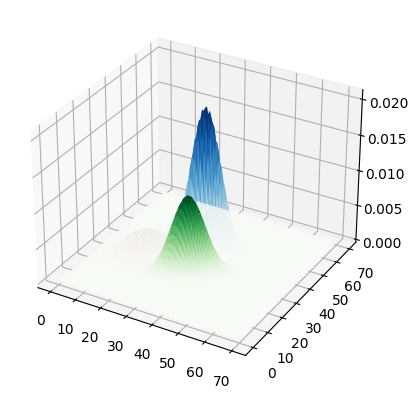

In [49]:
Gauss_part_0 = partial(Gauss_distr, mean_0, cov_0)

Gauss_part_1 = partial(Gauss_distr, mean_1, cov_1)

Gauss_part_2 = partial(Gauss_distr, mean_2, cov_2)

fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.linspace(0, 70, 100)
y = np.linspace(0, 70, 100)
X, Y = np.meshgrid(x, y)

Z = np.zeros((100,100))
for i in range(100):
  for j in range(100):
    vec = np.array([x[i],y[j]]).reshape((2,1))
    Z[i,j] = Gauss_part_0(vec)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='Reds', edgecolor='none')

Z = np.zeros((100,100))
for i in range(100):
  for j in range(100):
    vec = np.array([x[i],y[j]]).reshape((2,1))
    Z[i,j] = Gauss_part_1(vec)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='Blues', edgecolor='none')

Z = np.zeros((100,100))
for i in range(100):
  for j in range(100):
    vec = np.array([x[i],y[j]]).reshape((2,1))
    Z[i,j] = Gauss_part_2(vec)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='Greens', edgecolor='none')


The plots:

-The red distribution corresponds to the data_0 class (it does not show very well on the plot because it is a more spread out distribution compared to the other 2)

-The blue distribution corresponds to the data_1 class

-The green distribution corresponds to the data_2 class


# **Part B:**

Parzen Windows Method


In [50]:
data = np.array([0.44433663406480284,
                0.7925339518025013,
                2.545025517190781,
                -2.2405281354919766,
                -3.4146207810571516,
                0.4147250757128812,
                2.4716875609250395,
                3.2508533686500227,
                -2.2124157772514237,
                0.8103311540401823,
                -2.2378456480862434,
                -1.0343725151083125,
                -0.2866393999205472,
                0.35050031082846966,
                -0.23257661887644265,
                0.37104992044371976,
                -2.2036325076446386,
                -3.8777500488272874,
                2.8262247027233713,
                -1.2536054414966977,
                1.8300949136302889,
                -3.7924412874169358,
                2.251865254208296,
                0.2570457409578632,
                -0.9236636676383496,
                -2.5861327547112447,
                0.4627724385445401,
                -3.3917515364060162,
                2.519237568118281,
                2.0708437291833133,
                -1.4465788871798817,
                -0.9251829940016905,
                -0.22611204881145416,
                1.6993910469750857,
                2.1227353961983857,
                4.273196319071724,
                2.88777219096907,
                0.5666353785594004,
                -0.09509216549859753,
                2.3687417275274667,
                -1.0175404729039093,
                -0.2971809458117672,
                4.288425629676956,
                0.3889065821114318,
                0.6413221145161495,
                2.90622537474183,
                1.1598707423952994,
                -1.8672017031845551,
                -2.6808648382581612,
                -2.257356351084625,
                1.8438025659565977,
                0.5055260158237881,
                1.1443200941441618,
                -3.2732590783318884,
                -2.1425852058928094,
                3.4010894977139543,
                0.13564095268595905,
                -2.360071760287551,
                -1.9507138809874112,
                -1.4804736324707597,
                2.09839536202093,
                -3.6058980845275115,
                -0.13321524701596898,
                0.1612607752725668,
                -2.4182662843731277,
                1.6519289113802673,
                3.2352459229290136,
                1.2835510723130203,
                -0.46171103501133226,
                1.4385286848963696,])

***1.***

In [51]:
def ph_hypercube(u):
  return 1 if u <= 1/2 else 0

The pf_hypercube is a hypercude window function that returns 1 is the distance of a given point / h is smaller than 1/2, or 0 if else

***2.***

In [52]:
def ph_gauss(x, mean, s_div):
  return 1 / (s_div * m.sqrt(2 * np.pi)) * np.exp((-1 / 2) * ((x - mean) / s_div) ** 2)

The ph_gauss is a Gaussian kernel function that computes the 1-dimensional normal distribution with xi (from the data) as the x points, the center point we chose as the mean and h as the standard diviation of the distribution

***3.***

In [53]:
def ph_pick(c, h, kernel_type, xi):
  if kernel_type == "hypercube":
    return ph_hypercube(abs(c - xi) / h)
  elif kernel_type == "Gaussian":
    return ph_gauss(xi, c, h)
  else:
    raise Exception("Invalid kernel type")

ph_pick picks the type of kernel depending on the input we give and if we input something other than hypercube or Gaussian it raises an exception

***4.***

In [54]:
def dens_func(x, data, h, kernel_type):

  V = h #Όγκος
  sum = 0
  n = len(data)
  ph = partial(ph_pick, x, h, kernel_type)
  for i in range(len(data)):
    sum += 1 / V * ph(data[i])

  return sum / n

This is the density function that computes the probability of an x by making it the center of a distribution (kernel)

***5.***

***(a)***

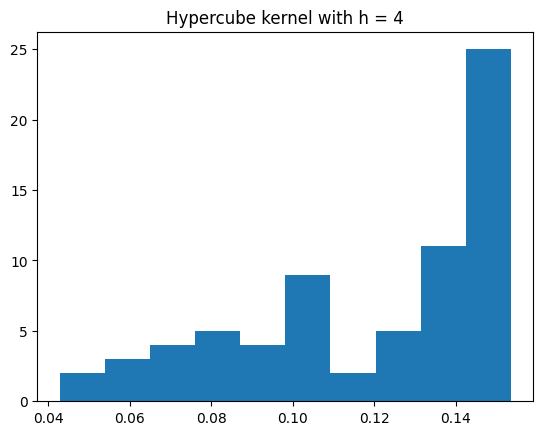

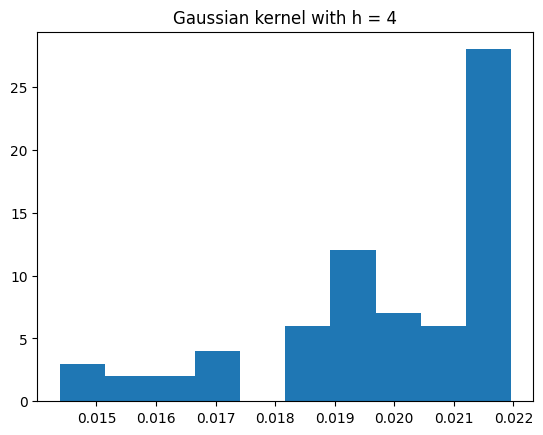

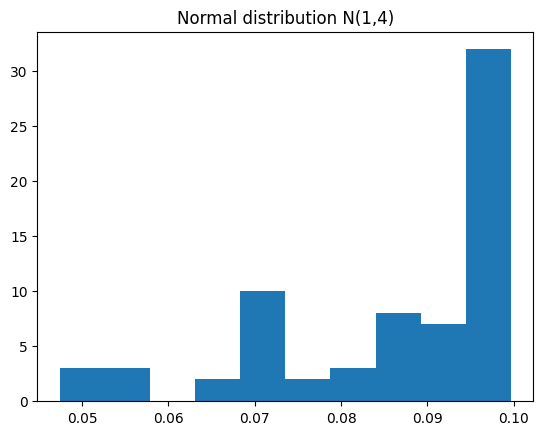

In [55]:
hyper = np.zeros(len(data))
gauss = np.zeros(len(data))
for i in range(len(data)):
  hyper[i] = dens_func(data[i], data, 4, "hypercube")
  gauss[i] = dens_func(data[i], data, 4, "Gaussian")


normal = norm.pdf(data, loc = 1, scale = 4)

plt.title("Hypercube kernel with h = 4")
plt.hist(hyper)
plt.show()

plt.title("Gaussian kernel with h = 4")
plt.hist(gauss)
plt.show()


plt.title("Normal distribution N(1,4)")
plt.hist(normal)
plt.show()

***(b)***

Minimum square error for hypercube kernel:  0.0475509687979422
Minimum square error for gaussian kernel:  0.015554944800419412
h for minimum square error for hypercube kernel:  0.2
h for minimum square error for gaussian kernel:  0.4


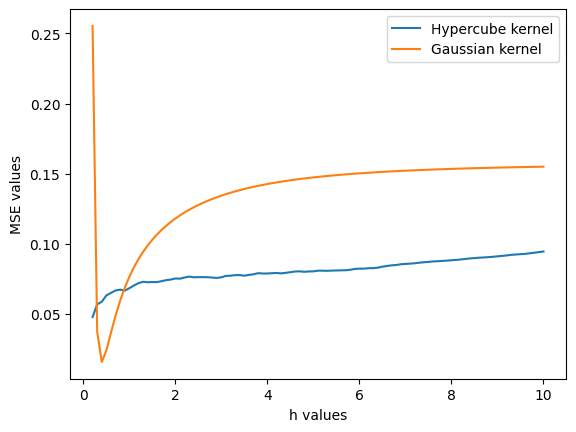

In [56]:
h_ar = np.linspace(0.2, 10, 99)

hyper = np.zeros((len(h_ar), len(data)))
gauss = np.zeros((len(h_ar), len(data)))
for i in range(len(h_ar)):
  for j in range(len(data)):
    hyper[i][j] = dens_func(data[j], data, h_ar[i], "hypercube")
    gauss[i][j] = dens_func(data[j], data, h_ar[i], "Gaussian")

normal = norm.pdf(norm.pdf(data, loc = 1, scale = 4))

n = len(normal)

MSE_hypercube = np.zeros(len(h_ar))
for i in range(len(MSE_hypercube)):
  for j in range(len(normal)):
    MSE_hypercube[i] += (hyper[i][j] - normal[j]) ** 2

MSE_gauss = np.zeros(len(h_ar))
for i in range(len(MSE_gauss)):
  for j in range(len(normal)):
    MSE_gauss[i] += (gauss[i][j] - normal[j]) ** 2

MSE_hypercube = MSE_hypercube / n
MSE_gauss = MSE_gauss / n
plt.plot(h_ar, MSE_hypercube, label = "Hypercube kernel")
plt.plot(h_ar, MSE_gauss, label = "Gaussian kernel")
plt.ylabel("MSE values")
plt.xlabel("h values")
plt.legend()
print("Minimum square error for hypercube kernel: ", MSE_hypercube[MSE_hypercube.argmin()])
print("Minimum square error for gaussian kernel: ", MSE_gauss[MSE_gauss.argmin()])
print("h for minimum square error for hypercube kernel: ", h_ar[MSE_hypercube.argmin()])
print("h for minimum square error for gaussian kernel: ", h_ar[MSE_gauss.argmin()])

The h_ar contains all the "h" values from 0.2 to 10 with a step of 0.1. We can note that for a hypercube kernel the h with the smallest error is 0.2, while the gaussian kernel minimum error h is 0.4

# **Part C:**

K-Nearest Neighbors (KNN) Classification

In [57]:
train_data = np.array([[12.007316379366022, 35.453343840864136, 0.0],
                       [15.85802747727258, 32.73153891115562, 0.0],
                       [14.544735894683827, 34.72789914689461, 0.0],
                       [14.336450700339272, 27.53028012319661, 0.0],
                       [17.153297933215566, 28.657291783700945, 0.0],
                       [11.772915687495166, 32.729446114647416, 0.0],
                       [13.351633281379616, 37.01936442107696, 0.0],
                       [12.785400760087164, 42.4057361644188, 0.0],
                       [21.964703199313593, 34.9466593663226, 0.0],
                       [11.82095541705878, 27.957215285045507, 0.0],
                       [13.025462089861636, 38.25202709652252, 0.0],
                       [11.736607836940316, 34.79279709628895, 0.0],
                       [20.629726346506207, 31.0042536372229, 0.0],
                       [11.871327025645483, 40.168471778391364, 0.0],
                       [19.12235095848515, 43.35466886533116, 0.0],
                       [16.555226106059198, 36.809862846985574, 0.0],
                       [8.599100836500378, 37.53774434509547, 0.0],
                       [13.856927802255358, 35.760145339031205, 0.0],
                       [11.619667858193406, 34.98560094428625, 0.0],
                       [13.364727517109467, 37.47009597163829, 0.0],
                       [14.296782484866847, 35.100387562158026, 0.0],
                       [14.980512580163303, 34.33587327809435, 0.0],
                       [15.106368994580997, 30.09163334353261, 0.0],
                       [14.845299928708526, 34.3185411862187, 0.0],
                       [14.291074728202979, 40.790037836387256, 0.0],
                       [15.677712519866775, 37.51392719715231, 1.0],
                       [12.227883149744216, 32.6739737305769, 1.0],
                       [22.971673086159704, 29.272784635350718, 1.0],
                       [20.25715137609918, 29.44234943276302, 1.0],
                       [14.085876451994762, 28.041964931997125, 1.0],
                       [9.566722347265202, 28.707666612187055, 1.0],
                       [19.683864852272148, 34.14385442219437, 1.0],
                       [6.369476958885775, 30.02818259717851, 1.0],
                       [18.641748269630547, 36.817848477933424, 1.0],
                       [4.1548488901098155, 17.598528798403017, 1.0],
                       [12.256412985285513, 36.84822554900505, 1.0],
                       [12.31542320106424, 36.261909047689635, 1.0],
                       [7.042987719817875, 28.639123879619923, 1.0],
                       [12.609757020930658, 31.77303691678669, 1.0],
                       [15.666612931298188, 30.92155046175968, 1.0],
                       [8.26269474290834, 29.181300941228834, 1.0],
                       [8.35969922969667, 33.47369871487308, 1.0],
                       [18.478894400715713, 34.247849032128116, 1.0],
                       [16.575618176630922, 38.38638489720046, 1.0],
                       [9.446566949560763, 19.753726204750123, 1.0],
                       [7.865683779839895, 27.323064659860023, 1.0],
                       [5.069436681388034, 28.15728044206776, 1.0],
                       [11.853658941742761, 28.307662937421608, 1.0],
                       [14.031465547058097, 32.85320122715258, 1.0],
                       [8.447916715728624, 24.874126576928127, 1.0]])

test_data = np.array([[5.592195311512395, 35.6999193871657, 1.0],
                      [13.333621510895533, 40.28918046627939, 0.0],
                      [10.733249778789123, 28.25624275461612, 1.0],
                      [6.2525288045799865, 25.736509310336512, 1.0],
                      [12.308845318440717, 29.03770600539197, 1.0],
                      [16.27613878224661, 31.790576530123573, 1.0],
                      [24.099039440890856, 34.99135933375871, 1.0],
                      [20.383747333476023, 30.28545611171144, 0.0],
                      [14.717472811101047, 28.86467005609947, 1.0],
                      [10.373630582669104, 22.877105646978112, 0.0],
                      [12.495403261838794, 35.91517518712359, 0.0],
                      [12.897445295789295, 28.479192063037416, 0.0],
                      [6.914464650498677, 22.466156316652278, 1.0],
                      [10.399006622653925, 28.8867124672721, 1.0],
                      [15.70353006618908, 22.143610580354622, 0.0],
                      [19.277795325421383, 35.09564741982842, 0.0],
                      [8.001675670052505, 22.482157661042464, 1.0],
                      [4.383440945547652, 23.408693294759146, 1.0],
                      [10.728211763103795, 32.77745637715107, 1.0],
                      [15.185676953132571, 33.73921780012754, 0.0],
                      [11.917235467445526, 27.630950709034465, 1.0],
                      [4.3421658305223065, 27.940407898100837, 1.0],
                      [17.6144060671268, 28.911024424376226, 1.0],
                      [7.853059854725827, 33.2303280708454, 1.0],
                      [8.285701089133454, 32.990700554220936, 0.0],
                      [9.320416922787706, 26.640988074914205, 0.0],
                      [16.455626818321953, 34.70855859677077, 0.0],
                      [17.754010834264285, 34.30775363866857, 0.0],
                      [14.8063863693831, 31.67296199309468, 0.0],
                      [14.757783602975078, 29.786493635043133, 1.0],
                      [9.930570422090852, 32.22831269703413, 1.0],
                      [15.054489283850817, 35.82871581795497, 0.0],
                      [9.750029107309508, 31.4280027220271, 1.0],
                      [13.586680286331283, 28.59915183535125, 0.0],
                      [20.09615738757791, 32.67866327391467, 0.0],
                      [14.569090796483817, 38.70662650856465, 0.0],
                      [17.02068254232686, 31.916200863626422, 1.0],
                      [7.690790172770082, 25.62442765033304, 1.0],
                      [17.224225194035046, 37.202039597105575, 0.0],
                      [15.380576088003362, 34.30144068207968, 1.0],
                      [11.97872908515288, 28.575869789477196, 1.0],
                      [14.618648855516811, 32.29578524163844, 0.0],
                      [19.590265746032763, 34.29006253034293, 1.0],
                      [12.008256626541108, 27.29153667084818, 0.0],
                      [10.596957826106175, 32.00766271626509, 0.0],
                      [11.555817375253879, 45.577624578231564, 0.0],
                      [8.09321620784735, 25.381014734705055, 1.0],
                      [12.08327393479309, 29.286112774782286, 1.0],
                      [14.900150330392192, 26.876456147977215, 1.0],
                      [10.440241676625666, 29.585393991193335, 1.0]])

***1.***

In [58]:
def dist_func(x, train_data):

  dist_array = np.zeros((len(train_data), 2))
  for i in range(len(train_data)):
    dist_array[i][0] = m.sqrt((x[0] - train_data[i][0]) ** 2 + (x[1] - train_data[i][1]) ** 2)
    dist_array[i][1] = train_data[i][2]

  return dist_array

dist_func takes an x and returns an array with the distances from all points of the train_data as well as the class (0 or 1)

***2.***

In [59]:
def knn_func(x, train_data, k):

  knn = np.zeros((k, 2))
  dist_array = dist_func(x, train_data)
  temp = np.zeros(k)
  num = 0

  for i in range(len(knn)):
    for j in range(len(dist_array)):
      for k in range(len(temp)):
        if j == temp[k]:
          num += 1
      if num == 0:
        if knn[i][0] == 0:
          knn[i][0] = dist_array[j][0]
          knn[i][1] = dist_array[j][1]
        elif knn[i][0] > dist_array[j][0]:
          knn[i][0] = dist_array[j][0]
          knn[i][1] = dist_array[j][1]
          temp[i] = j
      num = 0

  return knn

The knn_func takes an x point, an array with fata and the k value for the number of nearest neighbors we will use. It returns the distance of each point from x as well as the class of each x

***3.***

In [65]:
def knn_prob(train_data, test_data, k):

  knn_array = np.zeros((len(test_data), k, 2))
  print(knn_array)
  prob_array = np.zeros((len(test_data), 2))
  for i in range(len(test_data)):
    knn_array[i] = knn_func(test_data[i], train_data, k)

  for i in range(len(knn_array)):
    for j in range(k):
      if knn_array[i][j][1] == 0:
        prob_array[i][0] += 1
      else:
        prob_array[i][1] += 1
    prob_array[i] = prob_array[i] / k
  return prob_array

By inputing the train_data, the test_data and the value of k into the knn_prob function we get the probability value for each point. The array contains the probabilty of each x belonging in each class (the 0 index for class 0 and the 1 index for class 1)

***4.***

Best accuracy:  0.68


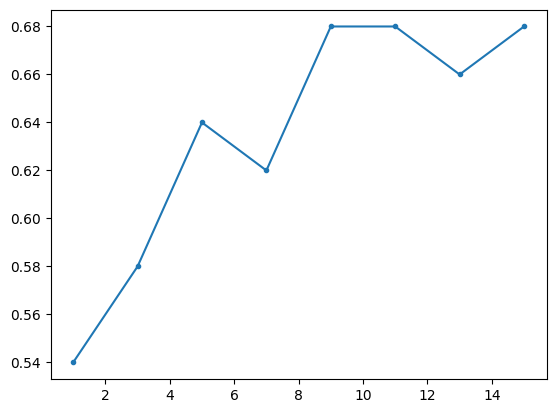

In [61]:
def class_func(train_data, test_data, k):

  prob_array = knn_prob(train_data, test_data, k)
  class_array = np.zeros(len(train_data))
  for i in range(len(prob_array)):
    class_array[i] = np.argmax(prob_array[i])
  return class_array

def acc_func(train_data, test_data, k):

  class_array = class_func(train_data, test_data, k)
  acc_count = 0
  for i in range(len(test_data)):
    if class_array[i] == test_data[i][2]:
        acc_count += 1

  acc_count = acc_count / len(test_data)
  return acc_count

k_list = np.array([1, 3, 5, 7, 9, 11, 13, 15])
acc_list = np.zeros((len(k_list)))
for k in range(len(k_list)):
  acc_list[k] = acc_func(train_data, test_data, k_list[k])

print("Best accuracy: ", acc_list[np.argmax(acc_list)])
plt.plot(k_list, acc_list, marker = ".")
plt.show()

class_func returns an array of the predicted classes for each sample in the test data and the acc_func computes the accuracy of a k by seeing how many accurate class predictions we make for a given k. We compute the accuraces for each k value in k_list and plot them. As we can see the values 9, 11 and 15 have the same accuracy (0.68). The best choice of k would be k = 9, because by increasing the k value we increase the array dimensions, and with that the needed calculations by a lot. So it is better to choose a smaller k